In [7]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
import GPyOpt

from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
from GPyOpt.methods import BayesianOptimization

In [8]:
X, y = load_diabetes(return_X_y=True)

In [9]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [10]:
y[0:5]

array([151.,  75., 141., 206., 135.])

In [11]:
reg = Lasso()
reg.fit(X,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
baseline = cross_val_score(reg, X, y, scoring='neg_mean_squared_error').mean()
baseline

-3850.836426532861

In [13]:
def L(alpha):
    reg = Lasso(alpha)
    reg.fit(X,y)
    score = cross_val_score(reg, X, y, scoring='neg_mean_squared_error').mean()
    score = np.array(score)
    return score

In [14]:
L(1)

array(-3850.83642653)

In [15]:
alphas = np.linspace(10e-5, 1)
Ls = [L(alpha) for alpha in alphas]

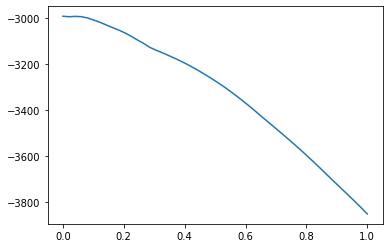

In [16]:
plt.plot(alphas, Ls)

In [17]:
alphas = np.random.uniform(low=10e-5, high=1, size=50)
Ls = [L(alpha) for alpha in sorted(alphas)]

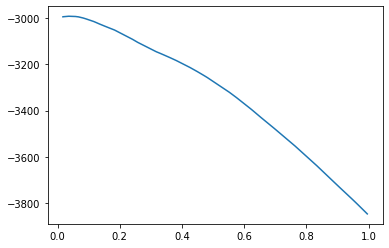

In [18]:
plt.plot(sorted(alphas), Ls)

In [19]:
param_dist = {'alpha': uniform(0,1)}
rs = RandomizedSearchCV(reg, param_distributions=param_dist, scoring='neg_mean_squared_error')
rs.fit(X,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002AA1C361DD8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [20]:
len(rs.cv_results_)

14

In [21]:
rs.best_estimator_

Lasso(alpha=0.08038380882283458, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Bayesian optimization

In [25]:
bds = [{'name': 'alpha', 'type': 'continuous', 'domain':(0,1)}]

optimizer = BayesianOptimization(f=L, model_type='GP', aquisition_type = 'EI', domain=bds)
optimizer.run_optimization(max_iter=10)

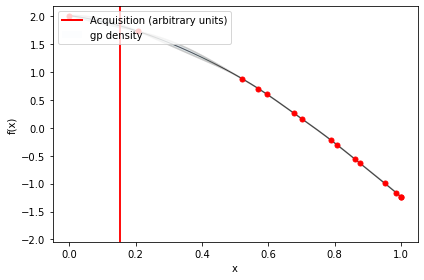

In [26]:
optimizer.plot_acquisition()

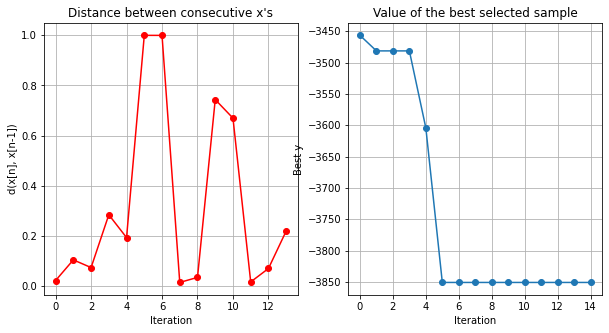

In [27]:
optimizer.plot_convergence()